In [1]:
import tensorflow as tf
tf.__version__
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

W0813 11:46:19.013953 3069975248 deprecation_wrapper.py:118] From /usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py:98: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0813 11:46:19.016617 3069975248 deprecation_wrapper.py:118] From /usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py:98: The name tf.AttrValue is deprecated. Please use tf.compat.v1.AttrValue instead.

W0813 11:46:19.018513 3069975248 deprecation_wrapper.py:118] From /usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py:98: The name tf.COMPILER_VERSION is deprecated. Please use tf.version.COMPILER_VERSION instead.

W0813 11:46:19.020396 3069975248 deprecation_wrapper.py:118] From /usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py:98: The name tf.CXX11_ABI_FLAG is deprecated. Please use tf.sysconfig.CXX11_ABI_FLAG instead.

W0813 11:46:19.022329 3069975248 deprecation_wrapper.py:118] From /usr/local/lib/python3.7/dist-packages/tensorflow/__init__

In [2]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

In [4]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=3)
model.summary()

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2646 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 16s 266us/sample - loss: 0.1079 - acc: 0.9669
Epoch 3/3
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0746 - acc: 0.9771
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-tr

In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.1093 - acc: 0.9667
0.10933054092377424 0.9667


In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_test.shape)
print(x_test[0])

(10000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [9]:
model.save('epic_num_reader.h5',overwrite=True,include_optimizer=True)
#https://github.com/keras-team/keras/issues/3426

In [10]:
new_model = tf.keras.models.load_model('epic_num_reader.h5')
new_model.build(x_train.shape)
new_model.summary()

W0813 11:47:17.383238 3069975248 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0813 11:47:17.386980 3069975248 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0813 11:47:17.889079 3069975248 hdf5_format.py:197] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized o

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss, acc = new_model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 132us/sample - loss: 0.1093 - acc: 0.9667
Restored model, accuracy: 96.67%


In [12]:
predictions =new_model.predict(x_train[[0]], verbose=1)
print(predictions)

1/1 [==============================] - 0s 51ms/sample
[[3.6968919e-09 6.8031216e-07 5.6403703e-08 1.1857447e-03 4.3861269e-12
  9.9881244e-01 9.5396580e-10 1.0402141e-08 3.3628242e-09 1.0100916e-06]]


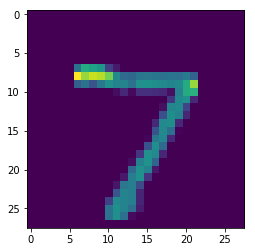

In [13]:
plt.imshow(x_test[0])

In [14]:
#**Tensorboard**<br>
#https://stackoverflow.com/questions/55970686/tensorboard-not-found-as-magic-function-in-jupyter<br>
#load_ext tensorboard.notebook<br>
%reload_ext tensorboard.notebook
%tensorboard --logdir="/home/pi"
#Use browser to open tensorboard with <ipaddress>:6006
